# Technical Exercise for Data Analyst

## 1.

With the goal of studying the quality of life in some of the main urban areas in Europe,we are fetching and analysing some data from the free API of "Teleport".

For this analysis we are using some of the main libraries that Python provides for data analysis and processing.

Importing the main libraries we are going to use

In [24]:
import requests 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy
import pprint


## 1a. API REST requests

First we make two call to get the names of the urban areas in Europe that Teleport provides.

In [25]:
r_UrbanAreas = requests.get('https://api.teleport.org/api/continents/geonames%3AEU/urban_areas/')
r_UrbanAreas_json = r_UrbanAreas.json()

In [7]:
#print(r_UrbanAreas_json)

As it can be seen, this data requires some cleaning and processing to be useful for the analysis.
First we will create a dataframe which will be used to make the following API calls.

In [26]:
UrbanAreas_catalog = pd.DataFrame(columns=['name','link'])
for ua_i in r_UrbanAreas_json['_links']['ua:items']:
    UrbanAreas_catalog = UrbanAreas_catalog.append({'name': ua_i['name'], 'link': ua_i['href']},ignore_index=True)
    
print(UrbanAreas_catalog.head())


        name                                               link
0     Aarhus  https://api.teleport.org/api/urban_areas/slug:...
1  Amsterdam  https://api.teleport.org/api/urban_areas/slug:...
2    Andorra  https://api.teleport.org/api/urban_areas/slug:...
3     Athens  https://api.teleport.org/api/urban_areas/slug:...
4  Barcelona  https://api.teleport.org/api/urban_areas/slug:...


Now, from each of these cities we are going to get some quality of life indicators from diferent API calls.
We will organize all that data in a dataframe. Once that is achieved, we can begin will the analysis process.

We can see that some of the values of the nested json are actually the labels of the values in the same level. To check that the structure is the same in all of the calls we are going to extract those labels and insert them in the dataframe. Once we check that, we can remove them.

In [27]:
UrbanAreas_df = pd.DataFrame(columns=['ua', 'lat', 'lon', 'country', 'med_salary_data_analyst','name_med_salary_data_analyst',
                                      'cost of living', 'name_cost of living', 'health', 'name_health', 'education',
                                      'name_education','connectivity','name_connectivity', 'score'] )


for ua_i in UrbanAreas_catalog['link']:
    
    r_ua = requests.get(ua_i)
    r_ua_json = r_ua.json()
    
    scores_link = ua_i + 'scores/'
    r_scores = requests.get(scores_link)
    r_scores_json = r_scores.json()
        
    salaries_link = ua_i + 'salaries/'
    r_salaries = requests.get(salaries_link)
    r_salaries_json = r_salaries.json()
    
    UrbanAreas_df = UrbanAreas_df.append({'ua': r_ua_json['_links']['ua:identifying-city']['name'],
                                          'country':r_ua_json['_links']['ua:countries'][0]['name'], 
                                          
                                          'lat': 0.5* (r_ua_json['bounding_box']['latlon']['north'] + r_ua_json['bounding_box']['latlon']['south']),
                                          'lon': 0.5* (r_ua_json['bounding_box']['latlon']['east'] + r_ua_json['bounding_box']['latlon']['west']),

                                          'med_salary_data_analyst': r_salaries_json['salaries'][15]['salary_percentiles']['percentile_50'],
                                          'name_med_salary_data_analyst': r_salaries_json['salaries'][15]['job']['id'],
                                          
                                          'cost of living': r_scores_json['categories'][1]['score_out_of_10'],
                                          'name_cost_of_living': r_scores_json['categories'][1]['name'],
                                          
                                          'health': r_scores_json['categories'][8]['score_out_of_10'],
                                          'name_health': r_scores_json['categories'][8]['name'],
                                          
                                          'education': r_scores_json['categories'][9]['score_out_of_10'],
                                          'name_education': r_scores_json['categories'][9]['name'], 
                                          
                                          'connectivity': r_scores_json['categories'][4]['score_out_of_10'],
                                          'name_connectivity': r_scores_json['categories'][4]['name'],
    
                                          'score': r_scores_json['teleport_city_score']}
                                          ,ignore_index=True)
    

    
    

print(UrbanAreas_df.head())

                 ua        lat        lon      country  \
0             Århus  56.178104  10.181798      Denmark   
1         Amsterdam  52.396000   4.906000  Netherlands   
2  Andorra la Vella  42.542270   1.597672      Andorra   
3            Athens  37.939500  23.685000       Greece   
4         Barcelona  41.389500   2.105000        Spain   

   med_salary_data_analyst name_med_salary_data_analyst  cost of living  \
0             60259.687912                 DATA-ANALYST           4.015   
1             40162.562154                 DATA-ANALYST           3.824   
2             35959.745654                 DATA-ANALYST           0.000   
3             17524.014857                 DATA-ANALYST           6.500   
4             22234.509449                 DATA-ANALYST           6.074   

   name_cost of living    health name_health  education name_education  \
0                  NaN  9.130667  Healthcare     5.3665      Education   
1                  NaN  8.899000  Healthcare     6.1

Once we check that all the values correspond to the right key we can delete those columns and save the dataframe in, for example, excel format "xlsx"

In [28]:
del UrbanAreas_df['name_med_salary_data_analyst']
del UrbanAreas_df['name_cost of living']
del UrbanAreas_df['name_health']
del UrbanAreas_df['name_education']
del UrbanAreas_df['name_connectivity'] 

print(UrbanAreas_df.head())

#Commented so it works if executed
#UrbanAreas_df.to_excel('C:/Users/Miguel/Documents/quality_of_life.xlsx')


                 ua        lat        lon      country  \
0             Århus  56.178104  10.181798      Denmark   
1         Amsterdam  52.396000   4.906000  Netherlands   
2  Andorra la Vella  42.542270   1.597672      Andorra   
3            Athens  37.939500  23.685000       Greece   
4         Barcelona  41.389500   2.105000        Spain   

   med_salary_data_analyst  cost of living    health  education  connectivity  \
0             60259.687912           4.015  9.130667     5.3665        3.5360   
1             40162.562154           3.824  8.899000     6.1800        8.3245   
2             35959.745654           0.000  0.000000     0.0000        0.5000   
3             17524.014857           6.500  7.258333     3.1625        3.7070   
4             22234.509449           6.074  8.366667     5.0290        5.8060   

       score name_cost_of_living  
0  65.090000      Cost of Living  
1  69.598784      Cost of Living  
2  29.364324      Cost of Living  
3  55.062568      Cost o

***

## 1.b. Data Analysis

Now that we have chosen some information about the main urban areas in Europe is time to do some analysis to determine which one would the most suitable according to the facts that we have chosen. 

In [29]:
#Commented so it works if executed
#UrbanAreas_df = pd.read_excel('C:/Users/Miguel/Documents/quality_of_life.xlsx')

First of all, let's get a quick summary and a boxplot to see what we can observe in a first look.

In [30]:
print(UrbanAreas_df.describe())

       Unnamed: 0         lat         lon  med_salary_data_analyst  \
count  111.000000  111.000000  111.000000               111.000000   
mean    55.000000   49.263679    9.198646             32577.080377   
std     32.186954    6.746539   14.160489             16336.925864   
min      0.000000   28.119595  -71.341650              4379.700053   
25%     27.500000   44.830119    0.006893             19430.014409   
50%     55.000000   50.046765    9.165000             32926.064469   
75%     82.500000   53.378529   18.180273             41885.112303   
max    110.000000   65.178000   44.882950             83953.341041   

       cost of living      health   education  connectivity       score  
count      111.000000  111.000000  111.000000    111.000000  111.000000  
mean         5.574018    7.710114    4.383486      4.682036   59.449716  
std          2.246268    1.815453    1.647519      2.139529    6.636052  
min          0.000000    0.000000    0.000000      0.500000   25.347027  

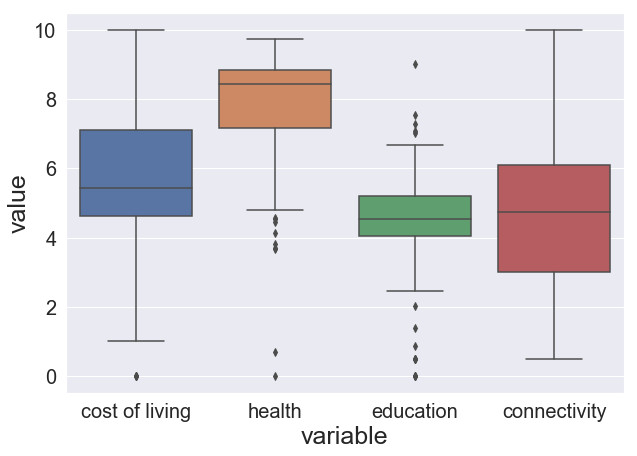

In [34]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(x="variable", y="value", data=pd.melt(UrbanAreas_df.loc[:, ['cost of living','health','education','connectivity']]))
plt.show()

The boxplot gives us a summary look about some quality of life indicators in Europe. For instance, we can see that health gets quite a good rate, having a passing grade in almost all urban areas, and most of them with more than a 7. Other indicators like cost of living and connectivity are more spread. Finally, education is the one that gets more compact reasults in a middle position rate.

Just with a first look we realize that the are some values that could be incorrect (For instance, Andorra has the lowest score in cost of living, health and education). If we had time enough, the best option would be to replace those values taking information from other sources of doing inference from other values that we have (For instance, taking an average value from other cities that surround it in Spain and France).

As it seems this errors occur only in some particular urban areas,for this case, the only thing we will do it removing the cities that have a cost of living equal to 0


In [35]:
print(UrbanAreas_df.loc[UrbanAreas_df['cost of living']== 0,])

     Unnamed: 0                ua        lat        lon    country  \
2             2  Andorra la Vella  42.542270   1.597672    Andorra   
38           38         Gibraltar  36.131977  -5.352917  Gibraltar   
75           75              Oulu  65.178000  25.868550    Finland   
104         104          Valletta  35.942550  14.386950      Malta   

     med_salary_data_analyst  cost of living    health  education  \
2               35959.745654             0.0  0.000000     0.0000   
38              61819.512752             0.0  0.706333     0.0000   
75              47106.248664             0.0  8.429000     5.4545   
104             23132.025570             0.0  7.778000     2.8195   

     connectivity      score name_cost_of_living  
2           0.500  29.364324      Cost of Living  
38          0.758  25.347027      Cost of Living  
75          2.716  58.018919      Cost of Living  
104         1.889  45.632432      Cost of Living  


In [36]:
UrbanAreas_df = UrbanAreas_df.loc[UrbanAreas_df['cost of living']!= 0,]

Another outlier to consider is a longitude value way lower than expected:

In [37]:
outliers_longitude = UrbanAreas_df.loc[UrbanAreas_df['lon']< -10,]
print(outliers_longitude)

    Unnamed: 0                          ua        lat        lon  country  \
49          49  Las Palmas de Gran Canaria  28.119595 -15.443086    Spain   
80          80                      Québec  46.856350 -71.341650   Canada   
81          81                   Reykjavík  64.034000 -21.983000  Iceland   

    med_salary_data_analyst  cost of living    health  education  \
49             16190.176779           7.717  9.035333      3.759   
80             40450.586285           6.037  8.725333      5.420   
81             62772.513651           1.000  8.575667      4.057   

    connectivity      score name_cost_of_living  
49        4.3235  54.333378      Cost of Living  
80        1.3815  64.683108      Cost of Living  
81        1.1350  59.119324      Cost of Living  



For an unknown reason, Québec infiltrated into the Europe urban areas. Hence, we have to remove it from our data.

In [38]:
UrbanAreas_df = UrbanAreas_df.loc[UrbanAreas_df['lon']> -70,]

***

Now that we have removed the outliers, the first we are going to do is checking which urban area is the best according to Teleport's criterion:

In [39]:
Teleport_best_ua = UrbanAreas_df.loc[UrbanAreas_df['score']==max(UrbanAreas_df['score']),'ua'].values[0]
print ('The best urban area regarding quality of life is ' + Teleport_best_ua)

The best urban area regarding quality of life is Munich


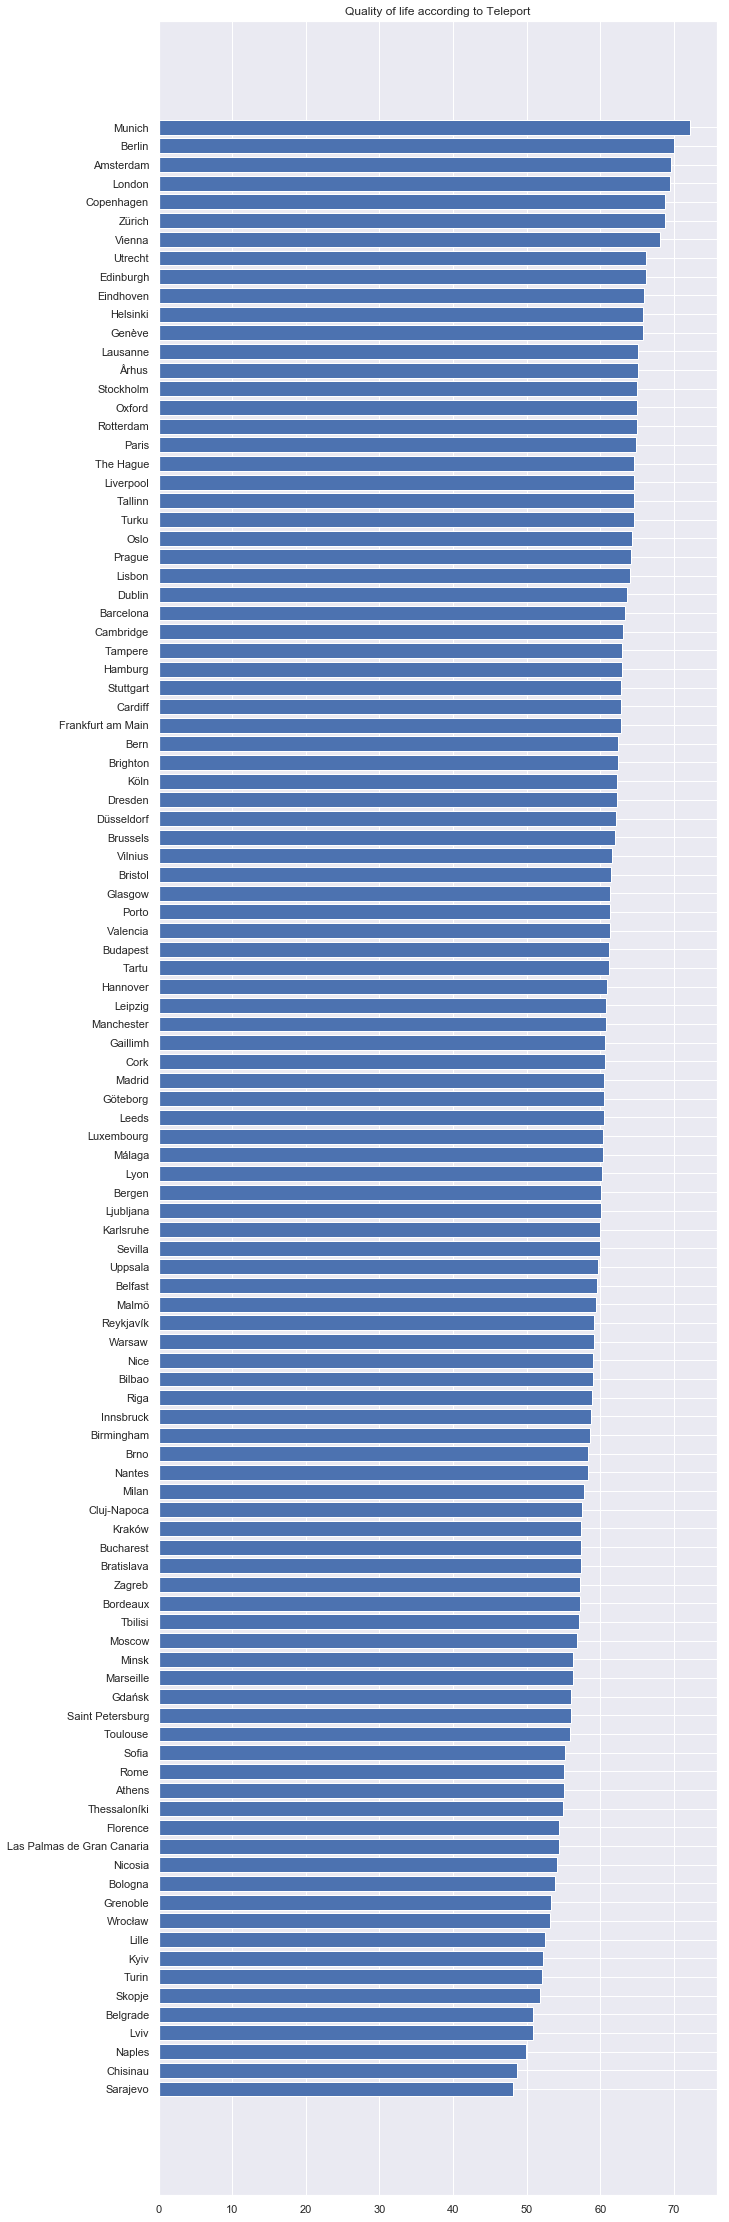

In [40]:
sns.set()
fig, ax = plt.subplots(figsize=(10, 40))

UrbanAreas_df_sorted = UrbanAreas_df.sort_values(by=['score'], ascending=False)

ax.barh(UrbanAreas_df_sorted['ua'], UrbanAreas_df_sorted['score'], align='center')
ax.invert_yaxis()  
ax.set_title('Quality of life according to Teleport')
plt.show()


And now by country, considering the average values of the urban areas in each country of Europe:

In [41]:
countries_df = UrbanAreas_df.groupby(['country'],as_index=False).agg({
'med_salary_data_analyst':'mean',
'cost of living':'mean',
'health':'mean',
'education':'mean',
'connectivity':'mean',
'score':'mean'
})
print(countries_df.head())


                  country  med_salary_data_analyst  cost of living    health  \
0                 Austria             37560.597842          4.9215  8.677833   
1                 Belarus              6213.202623          9.2890  4.126667   
2                 Belgium             34166.331362          4.4770  8.816333   
3  Bosnia and Herzegovina             23055.187114          8.6590  5.284667   
4                Bulgaria             11401.801189          8.5500  4.796667   

   education  connectivity      score  
0    4.59225        6.8005  63.451014  
1    0.50000        3.7665  56.250676  
2    6.65300        7.4675  61.962838  
3    0.00000        1.2070  48.124189  
4    2.01450        2.6665  55.262162  


In [42]:
Teleport_best_country = countries_df.loc[countries_df['score']==max(countries_df['score']),'country'].values[0]
print ('The best country regarding quality of life is ' + Teleport_best_country)

The best country regarding quality of life is Denmark


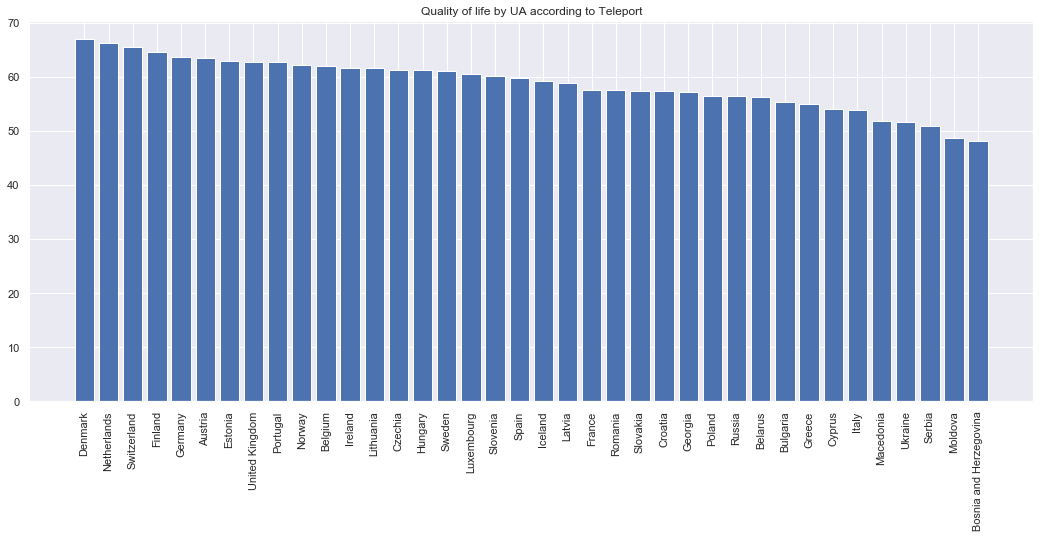

In [44]:
sns.set()
fig, ax = plt.subplots(figsize=(18, 7))
countries_df_sorted = countries_df.sort_values(by=['score'], ascending=False)
ax.bar(countries_df_sorted['country'], countries_df_sorted['score'], align='center')
ax.set_title('Quality of life by UA according to Teleport')
plt.xticks(rotation=90)
plt.show()


***
Back to urban areas, lets get the relation between the cost of living and the median salary a data analyst would get over Europe:

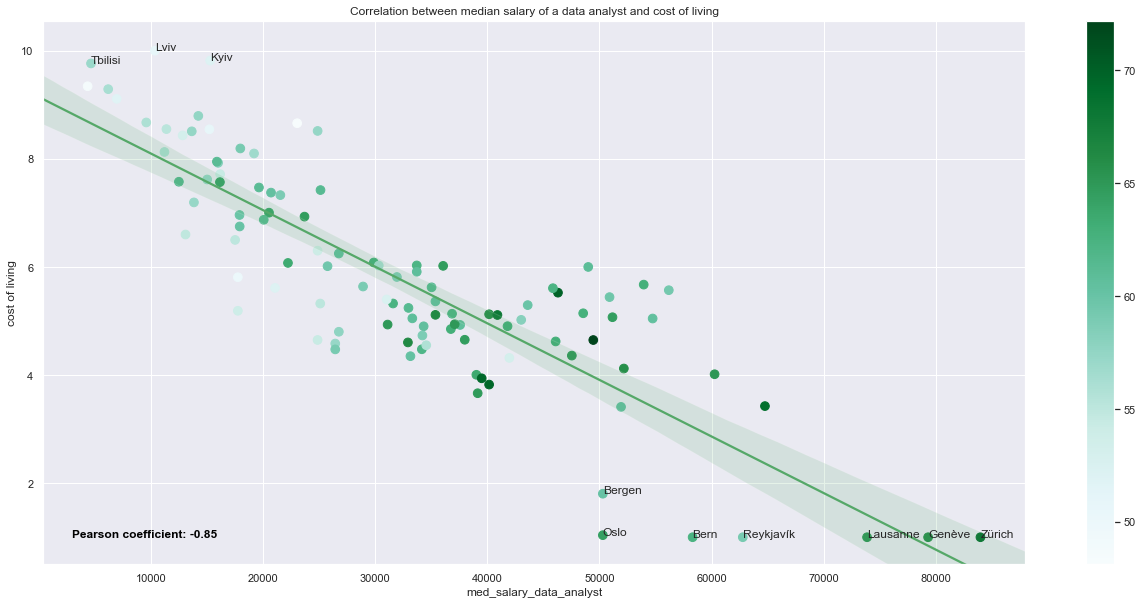

In [46]:
label_df = UrbanAreas_df.loc[(UrbanAreas_df['cost of living'] < 2) | (UrbanAreas_df['cost of living'] > 9.5), ]


fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(25,10)})


scatter = plt.scatter(UrbanAreas_df['med_salary_data_analyst'], UrbanAreas_df['cost of living'],
                     c = UrbanAreas_df['score'], s=75, cmap="BuGn")
plt.colorbar(scatter)

ax = sns.regplot(x='med_salary_data_analyst', y='cost of living', data=UrbanAreas_df,
            scatter=False, color = 'g')


ax.set_title('Correlation between median salary of a data analyst and cost of living')

annotation = "Pearson coefficient: " + str(round(np.corrcoef(UrbanAreas_df['med_salary_data_analyst'], UrbanAreas_df['cost of living'])[0, 1],2))
ax.text(3000, 1, annotation, horizontalalignment='left', size='medium', color='black', weight='semibold')


ax.set(ylim=(0.5, None))

for index, row in label_df.iterrows():
    ax.annotate(row['ua'], (row['med_salary_data_analyst'], row['cost of living']))

plt.show()




It might be possible that beforehand we were expecting to have some cities like Oslo or Zurich to have a high cost of living. This is true, indeed, but when assigning them a low rate Teleport is just focusing on the negative implication of it. This is the reason why we get a decresing trend instead of a, perhaps expected, ascending one.
It is easy to see that there is a strong linear correlation between both variable (inverse correlation, with a Pearson coefficient of -0.85).

Back to analysing the correlation between these two variables and a final score of quality of life, we can observe that even though a high score in cost of living is positive, it is normally associated with low salaries (at least for a data analyst job) and the quality of life score in those countries in low.

We do not get the opposite correlation quite the same. Even though countries with the highest incomes seem to have a proper score, the best ones are placed in the middle of the graph.
This seems to match the fact that money is not the only thing that matter to get quality of life but the lack of it might be a problem.
***


Depending on the source, you can hear that life is better the northest you go or just opposite. Let's check if it is so and if it happens the same in the east-west axis:

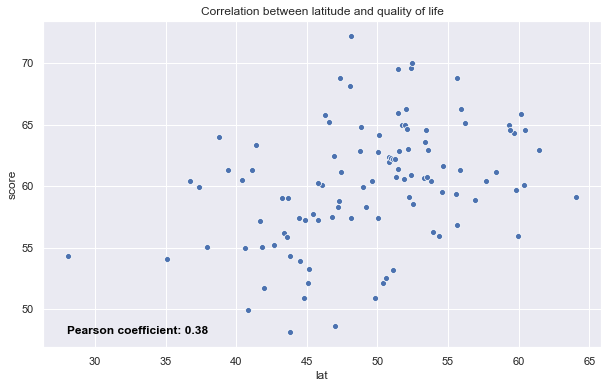

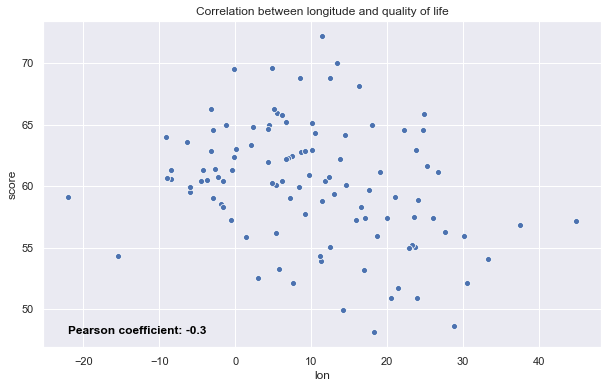

In [48]:
fig1, ax1 = plt.subplots()

sns.set(rc={'figure.figsize':(10,6)})
cmap = sns.cubehelix_palette(8, as_cmap=True)


ax1 = sns.scatterplot(x='lat', y='score',
                      palette = cmap,
                      data=UrbanAreas_df)

ax1.set_title('Correlation between latitude and quality of life')

annotation = "Pearson coefficient: " + str(round(np.corrcoef(UrbanAreas_df['lat'], UrbanAreas_df['score'])[0, 1],2))
ax1.text(28,48, annotation, horizontalalignment='left', size='medium', color='black', weight='semibold')


fig2, ax2 = plt.subplots()

sns.set(rc={'figure.figsize':(10,6)})
cmap = sns.cubehelix_palette(8, as_cmap=True)


ax2 = sns.scatterplot(x='lon', y='score',
                     data=UrbanAreas_df)


ax2.set_title('Correlation between longitude and quality of life')

annotation = "Pearson coefficient: " + str(round(np.corrcoef(UrbanAreas_df['lon'], UrbanAreas_df['score'])[0, 1],2))
ax2.text(-22,48, annotation, horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.show()

Neither of them seem correlated. In fact a pearson correlation of ±0.3 shows a low correlation between variables.
What we do see in that in the middle latitudes and longitudes of Europe is where the best quality of life scores are placed.
***
Now let's check connectivity:

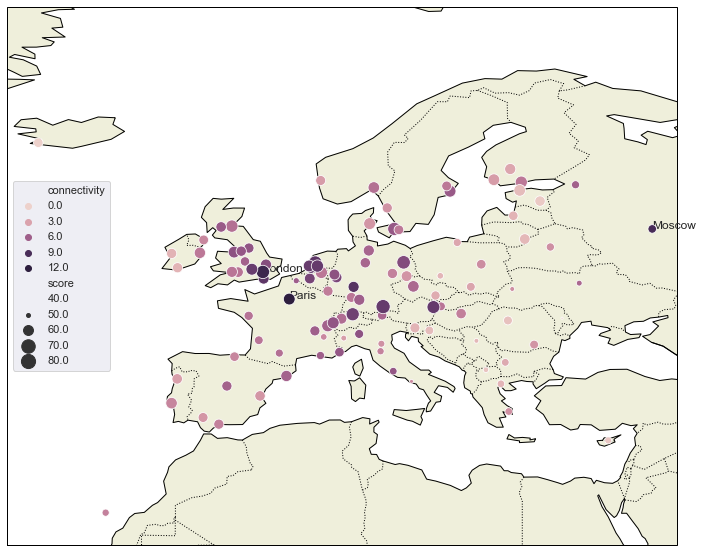

In [51]:
    label_df = UrbanAreas_df.loc[(UrbanAreas_df['connectivity'] > 9) , ]
    
    fig, ax = plt.subplots(figsize=(12,12))

    ax = plt.axes(projection=cartopy.crs.PlateCarree())

    ax.add_feature(cartopy.feature.LAND)
    #ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.COASTLINE, zorder = 1)
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':', zorder = 2)


    ax.set_extent([-25, 40, 25, 75])
    
    cmap = sns.cubehelix_palette(8, as_cmap=True)
    
    ax = sns.scatterplot(x='lon', y='lat',
                 size = 'score',
                 sizes = (0, 200),
                 hue= 'connectivity',
                 palette=cmap,
                 data=UrbanAreas_df, zorder = 999999)
    #ax.get_legend().remove()

    for index, row in label_df.iterrows():
        ax.annotate(row['ua'], (row['lon'], row['lat']))


    plt.show()

Apart from the most connected ones (London, Paris and Moscow) most cities with the highest connectivity are located in central Europe, which makes sense due to proximity and lack of geographic obstables such as water masses and mountains.
In this plot it is easy to appreciate what the north-south and east-west graphics told us: The best quality of life areas are in Central Europe

To finish the data analysis, let's check the scores in health and education:

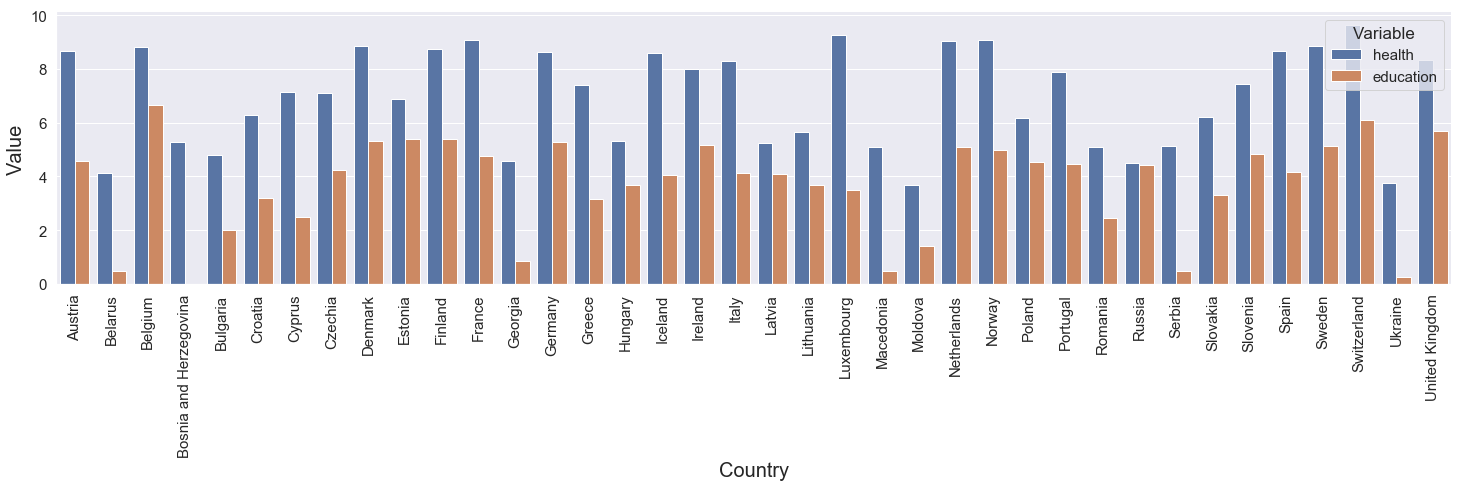

In [64]:
fig, ax = plt.subplots(figsize=(25,5))

rc={'axes.labelsize': 20, 'font.size': 15, 'legend.fontsize': 15,
    'axes.titlesize': 15,'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc)
melt = countries_df.loc[:, ['country', 'health','education']].melt(id_vars='country').rename(columns=str.title)
HE_plot = sns.barplot(x='Country', y='Value', hue='Variable', data=melt)
HE_plot.set_xticklabels(HE_plot.get_xticklabels(), rotation=90)
sns.despine(fig)



As we saw at the begining, despites having quite high scores in health, most countries appear to have problems to pass and have a score of 5, even the UK, which has always had a solid reputation.
***

### Conclusion:
After the performed analysis, a better understanding of quality of life in Europe is achieved. This information could help users to decide which urban area suits the best to each one, according to their preferences and criteria.
***

## 2.

To keep all the exercise in a same format, exercise 2 will be solved below. For this, PyMongo will be used.

PyMongo is a Python distribution containing tools for working with MongoDB. In fact, PyMongo commands are quite similar to standard MongoDB ones.

https://api.mongodb.com/python/current/

In [141]:
#Install pymongo from the command prompt
!pip install pymongo

## 2.a. Data storage

To insert data into MongoDB some code will be reutilize to call the APIs. Data will be inserted into a predefined dictionary and inserted into a database called "Empathy" and a collection called "ua"




In [65]:
from pymongo import MongoClient
client = MongoClient()

db = client['empathy']
collection = db['ua']

In [66]:
# To vary a little bit, know we will call the API for South America urban areas
r_UrbanAreas = requests.get('https://api.teleport.org/api/continents/geonames%3ASA/urban_areas/')
r_UrbanAreas_json = r_UrbanAreas.json()

UrbanAreas_catalog = pd.DataFrame(columns=['name','link'])
for ua_i in r_UrbanAreas_json['_links']['ua:items']:
    UrbanAreas_catalog = UrbanAreas_catalog.append({'name': ua_i['name'], 'link': ua_i['href']},ignore_index=True)



for ua_i in UrbanAreas_catalog['link']:
    
    r_ua = requests.get(ua_i)
    r_ua_json = r_ua.json()

    scores_link = ua_i + 'scores/'
    r_scores = requests.get(scores_link)
    r_scores_json = r_scores.json()
        
    salaries_link = ua_i + 'salaries/'
    r_salaries = requests.get(salaries_link)
    r_salaries_json = r_salaries.json()
    
    
    ua_dict = {'name': r_ua_json['_links']['ua:identifying-city']['name'],
               'location': {
                   'country': r_ua_json['_links']['ua:countries'][0]['name'],
                   'lat': 0.5* (r_ua_json['bounding_box']['latlon']['north'] + r_ua_json['bounding_box']['latlon']['south']),
                   'lon': 0.5* (r_ua_json['bounding_box']['latlon']['east'] + r_ua_json['bounding_box']['latlon']['west'])
               },
               'categories':{
                   'med_salary_data_analyst':r_salaries_json['salaries'][15]['salary_percentiles']['percentile_50'],
                   'cost of living':r_scores_json['categories'][1]['score_out_of_10'],
                   'health':r_scores_json['categories'][8]['score_out_of_10'],
                   'education':r_scores_json['categories'][9]['score_out_of_10'],
                   'connectivity':r_scores_json['categories'][4]['score_out_of_10'],
                   'score':r_scores_json['teleport_city_score']
               }
                      
                }
    
    collection.insert_one(ua_dict).inserted_id

As we don't have a proper value to work as an id (normally an integer or code), we will use the _id automatically added, and create some new indexes to accelerate some queries (specially when sorting), even though the number of documents for this example is not too high.

In [67]:
db.ua.create_index('name')

'name_1'

In [68]:
pprint.pprint(db.ua.find_one())

{'_id': ObjectId('5e66b35247f26482c2df5b66'),
 'categories': {'connectivity': 0.645,
                'cost of living': 9.295000000000002,
                'education': 0.0,
                'health': 4.891333333333333,
                'med_salary_data_analyst': 6704.0953725924555,
                'score': 47.11594594594596},
 'location': {'country': 'Paraguay',
              'lat': -25.291531,
              'lon': -57.541312500000004},
 'name': 'Asunción'}


***
So far, we have created dataframes or inserted data into MongoDB processing data from the API calls in advance. Now, we are going to insert some raw data, directly from the API call into a new collection called "raw" inside the same database:

In [69]:
from pymongo import MongoClient
client = MongoClient()

db = client['empathy']
collection = db['raw']

r_UrbanAreas = requests.get('https://api.teleport.org/api/continents/geonames%3ASA/urban_areas/')
r_UrbanAreas_json = r_UrbanAreas.json()

for ua_i in r_UrbanAreas_json['_links']['ua:items']:
    r_ua = requests.get(ua_i['href'])
    r_ua_json = r_ua.json()

    collection.insert_one(r_ua_json).inserted_id

## 2.b. Data retrieval

To end with the assessment, some queries will be executed to retrieve documents from the database and collection created

In [70]:
print( 'There are ' + str(db.ua.count_documents({})) + ' documents in the collection')

There are 15 documents in the collection


Retrieve part of the document corresponding to Quito:

In [71]:
pprint.pprint(db.ua.find_one({'name': 'Quito'},{'_id':0, 'name':1, 'location':1, 'categories':1}))

{'categories': {'connectivity': 0.8900000000000001,
                'cost of living': 7.822,
                'education': 0.0,
                'health': 5.324,
                'med_salary_data_analyst': 16386.772517218345,
                'score': 48.191351351351365},
 'location': {'country': 'Ecuador',
              'lat': -0.20290149999999998,
              'lon': -78.43791999999999},
 'name': 'Quito'}


Retrieve the urban areas which pass in health but fail in education:

In [72]:
query = db.ua.find({"categories.health": {"$gte": 5}, "categories.education": {"$lt": 5}},{'_id':0, 'name':1, 'location.country':1}).sort([('location.country',1), ('name',1)])
print('The urban areas that pass in health but fail in education:')
for document_i in query:
    print(document_i)

The urban areas that pass in health but fail in education:
{'name': 'Buenos Aires', 'location': {'country': 'Argentina'}}
{'name': 'Curitiba', 'location': {'country': 'Brazil'}}
{'name': 'Florianópolis', 'location': {'country': 'Brazil'}}
{'name': 'Porto Alegre', 'location': {'country': 'Brazil'}}
{'name': 'São Paulo', 'location': {'country': 'Brazil'}}
{'name': 'Santiago', 'location': {'country': 'Chile'}}
{'name': 'Bogotá', 'location': {'country': 'Colombia'}}
{'name': 'Medellín', 'location': {'country': 'Colombia'}}
{'name': 'Quito', 'location': {'country': 'Ecuador'}}
{'name': 'Montevideo', 'location': {'country': 'Uruguay'}}


Retrieve the urban areas and their location when they are in the north hemisphere, sorted by country and urban area:

In [51]:
query = db.ua.find({"location.lat": {"$gt": 0}},{'_id':0, 'name':1, 'location':1}).sort([('location.country',1), ('name',1)])
print('The urban areas in the north hemisphere are :')
for document_i in query:
    print(document_i)

    
    

The urban areas in the north hemisphere are :
{'name': 'Bogotá', 'location': {'country': 'Colombia', 'lat': 4.6565, 'lon': -74.094}}
{'name': 'Medellín', 'location': {'country': 'Colombia', 'lat': 6.2535, 'lon': -75.582}}
{'name': 'Caracas', 'location': {'country': 'Venezuela', 'lat': 10.4683915, 'lon': -66.8903655}}


Retrieve the number of urban areas in each country, sorted by alphabetic order:

In [73]:
query=db.ua.aggregate(
   [
     {'$group':
         {
           '_id': '$location.country',
           'n': { '$sum': 1 }
         }
     },
       
    {'$sort': {'_id':1} }
       
   ]
)
#Falta sort
for document_i in query:
    pprint.pprint(document_i)
    
    '''           'urban areas': { '$push':  { 'name': "$name", 'location':{'lat':'$location.lat', 'lon':'$location.lon'}} }
'''

{'_id': 'Argentina', 'n': 1}
{'_id': 'Bolivia', 'n': 1}
{'_id': 'Brazil', 'n': 5}
{'_id': 'Chile', 'n': 1}
{'_id': 'Colombia', 'n': 2}
{'_id': 'Ecuador', 'n': 1}
{'_id': 'Paraguay', 'n': 1}
{'_id': 'Peru', 'n': 1}
{'_id': 'Uruguay', 'n': 1}
{'_id': 'Venezuela', 'n': 1}


Reshape documents so as to get in the first level the countries and their urban areas as sub-documents:

In [74]:
query=db.ua.aggregate(
   [
     {'$group':
         {
           '_id': '$location.country',
           'urban areas': { '$push':  { 'name': "$name", 'score': "$categories.score"} }
         }
     },
       
    {'$sort': {'_id':1} }
       
   ]
)
#Falta sort
for document_i in query:
    pprint.pprint(document_i)
    

{'_id': 'Argentina',
 'urban areas': [{'name': 'Buenos Aires', 'score': 49.59229729729729}]}
{'_id': 'Bolivia',
 'urban areas': [{'name': 'La Paz', 'score': 33.88797297297296}]}
{'_id': 'Brazil',
 'urban areas': [{'name': 'Curitiba', 'score': 46.45472972972971},
                 {'name': 'Florianópolis', 'score': 43.69945945945945},
                 {'name': 'Porto Alegre', 'score': 44.05797297297297},
                 {'name': 'Rio de Janeiro', 'score': 45.45878378378378},
                 {'name': 'São Paulo', 'score': 47.716891891891876}]}
{'_id': 'Chile',
 'urban areas': [{'name': 'Santiago', 'score': 59.10459459459461}]}
{'_id': 'Colombia',
 'urban areas': [{'name': 'Bogotá', 'score': 52.68162162162161},
                 {'name': 'Medellín', 'score': 52.440270270270275}]}
{'_id': 'Ecuador',
 'urban areas': [{'name': 'Quito', 'score': 48.191351351351365}]}
{'_id': 'Paraguay',
 'urban areas': [{'name': 'Asunción', 'score': 47.11594594594596}]}
{'_id': 'Peru', 'urban areas': [{'name'